 ### LEAD SCORING CASE STUDY

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. X Education has appointed us to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance.

### Step1: Importing the data 

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the necessary libraries
import numpy as np, pandas as pd

In [3]:
# im[orting the dataset
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step2: Understanding the Data

In [4]:
# finding the shape of the dataframe
df.shape

(9240, 37)

So the total number of records in our dataset is 9240 and the number of columns is 37.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Here, we can see the datatypes for the different fields in our dataset.

## Data Preparation

As we can see some of the fields in our data is numeric while most of it is categorical. Also, we can observe that some of the columns in the data have very large names that can be difficult to handle for further analysis. Thus, we will rename some of the columns in the dataframe

In [6]:
# Renaming some fields
df.rename(columns ={"Lead Origin":"Lead_Origin","Lead Source":"Lead_Source","Do Not Email":"Not_Email","Do Not Call":"Not_Call","Total Time Spent on Website":"Time_Website","Page Views Per Visit":"Page_per_Visit","Last Activity":"Last_Activity","How did you hear about X Education":"Source_X_Edu","What is your current occupation":"Curr_Occupation","What matters most to you in choosing a course":"Matters_most","Newspaper Article":"Newspaper_Article","X Education Forums":"X_Edu_Forums","Digital Advertisement":"Digital_ad","Through Recommendations":"Recommendations","Receive More Updates About Our Courses":"More_Updates","Lead Quality":"Lead_Quality","Update me on Supply Chain Content":"Supply_Chain_Content","Get updates on DM Content":"DM_Content","Lead Profile":"Lead_Profile","Asymmetrique Activity Index":"AAI","Asymmetrique Profile Index":"API","Asymmetrique Activity Score":"AAS","Asymmetrique Profile Score":"APS","I agree to pay the amount through cheque":"Pay_Through_Cheque","A free copy of Mastering The Interview":"free_Copy_Master_Interview","Last Notable Activity":"Last_Notable_Activity"},inplace = True)
df.head()

,Prospect ID,Lead Number,Lead_Origin,Lead_Source,Not_Email,Not_Call,Converted,TotalVisits,Time_Website,Page_per_Visit,...,DM_Content,Lead_Profile,City,AAI,API,AAS,APS,Pay_Through_Cheque,free_Copy_Master_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


There are some useless columns that we can drop for this analysis like Prospect ID and Lead Number.

In [7]:
#dropping some columns
df.drop(["Prospect ID","Lead Number"],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Lead_Origin                 9240 non-null   object 
 1   Lead_Source                 9204 non-null   object 
 2   Not_Email                   9240 non-null   object 
 3   Not_Call                    9240 non-null   object 
 4   Converted                   9240 non-null   int64  
 5   TotalVisits                 9103 non-null   float64
 6   Time_Website                9240 non-null   int64  
 7   Page_per_Visit              9103 non-null   float64
 8   Last_Activity               9137 non-null   object 
 9   Country                     6779 non-null   object 
 10  Specialization              7802 non-null   object 
 11  Source_X_Edu                7033 non-null   object 
 12  Curr_Occupation             6550 non-null   object 
 13  Matters_most                6531 

Also, we can observe that some of the columns are not completely filled. They have missing values. For each of the column, lets print the number of nulls.

In [9]:
# Finding the number of nulls for each column
for col in df.columns:
    print(col+":",df[col].isnull().sum())
    

Lead_Origin: 0
Lead_Source: 36
Not_Email: 0
Not_Call: 0
Converted: 0
TotalVisits: 137
Time_Website: 0
Page_per_Visit: 137
Last_Activity: 103
Country: 2461
Specialization: 1438
Source_X_Edu: 2207
Curr_Occupation: 2690
Matters_most: 2709
Search: 0
Magazine: 0
Newspaper_Article: 0
X_Edu_Forums: 0
Newspaper: 0
Digital_ad: 0
Recommendations: 0
More_Updates: 0
Tags: 3353
Lead_Quality: 4767
Supply_Chain_Content: 0
DM_Content: 0
Lead_Profile: 2709
City: 1420
AAI: 4218
API: 4218
AAS: 4218
APS: 4218
Pay_Through_Cheque: 0
free_Copy_Master_Interview: 0
Last_Notable_Activity: 0


In [10]:
# Also finding % of nulls for each of the column
for col in df.columns:
    print(col+":",df[col].isnull().sum()*100/df.shape[0])

Lead_Origin: 0.0
Lead_Source: 0.38961038961038963
Not_Email: 0.0
Not_Call: 0.0
Converted: 0.0
TotalVisits: 1.4826839826839826
Time_Website: 0.0
Page_per_Visit: 1.4826839826839826
Last_Activity: 1.1147186147186148
Country: 26.634199134199132
Specialization: 15.562770562770563
Source_X_Edu: 23.885281385281385
Curr_Occupation: 29.11255411255411
Matters_most: 29.318181818181817
Search: 0.0
Magazine: 0.0
Newspaper_Article: 0.0
X_Edu_Forums: 0.0
Newspaper: 0.0
Digital_ad: 0.0
Recommendations: 0.0
More_Updates: 0.0
Tags: 36.28787878787879
Lead_Quality: 51.59090909090909
Supply_Chain_Content: 0.0
DM_Content: 0.0
Lead_Profile: 29.318181818181817
City: 15.367965367965368
AAI: 45.64935064935065
API: 45.64935064935065
AAS: 45.64935064935065
APS: 45.64935064935065
Pay_Through_Cheque: 0.0
free_Copy_Master_Interview: 0.0
Last_Notable_Activity: 0.0


### Handling missing values

Here we are going to undertake 3 steps:
 1. If % nulls in column is >25% : drop those columns
 2. If % nulls in column is <2% : delete the records having nulls
 3. If % nulls is between 2% and 30%, impute some values to the missing values/nulls.

As we can see, the columns in the first category are: Country, Curr_Occupation, Matters_most, Tags, Lead_Quality, Lead_Profile, AAI, API, AAS and APS. Lets drop them.

In [11]:
# dropping above columns
df.drop(["Country","Curr_Occupation","Matters_most","Tags","Lead_Quality","Lead_Profile","AAI","API","AAS","APS"], axis=1, inplace=True)

In [12]:
df.head()

,Lead_Origin,Lead_Source,Not_Email,Not_Call,Converted,TotalVisits,Time_Website,Page_per_Visit,Last_Activity,Specialization,...,Newspaper,Digital_ad,Recommendations,More_Updates,Supply_Chain_Content,DM_Content,City,Pay_Through_Cheque,free_Copy_Master_Interview,Last_Notable_Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,No,No,No,No,No,No,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,No,No,No,No,No,No,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,No,No,No,No,No,No,Mumbai,No,No,Modified


Now, moving on to the second category. Such columns are: TotalVisits, Page_per_Visit,Last_Activity. Lets drop the null records in these columns one by one.

In [13]:
# dropping nulls in TotalVisits
df = df[~df.TotalVisits.isnull()]

In [14]:
# dropping nulls in Page_per_Visit
df  = df[~df.Page_per_Visit.isnull()]

In [15]:
#dropping nulls in Last_Activity
df = df[~df.Last_Activity.isnull()]

In [16]:
df.shape

(9103, 25)

As we can see, we haven't lost our significant portion of data by dropping these columns. Our 3rd category of columns are: Specialization, Source_X_Edu and City. Now, before making any changes to these columns, Lets check each of the remaining columns for hidden missing values or bad values.

**Checking for hidden missing values**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Lead_Origin                 9103 non-null   object 
 1   Lead_Source                 9074 non-null   object 
 2   Not_Email                   9103 non-null   object 
 3   Not_Call                    9103 non-null   object 
 4   Converted                   9103 non-null   int64  
 5   TotalVisits                 9103 non-null   float64
 6   Time_Website                9103 non-null   int64  
 7   Page_per_Visit              9103 non-null   float64
 8   Last_Activity               9103 non-null   object 
 9   Specialization              7672 non-null   object 
 10  Source_X_Edu                6903 non-null   object 
 11  Search                      9103 non-null   object 
 12  Magazine                    9103 non-null   object 
 13  Newspaper_Article           9103 

In [18]:
#printing value_counts for each categorical column
df.Lead_Origin.value_counts()

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead_Origin, dtype: int64

In [19]:
df.Lead_Source.value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead_Source, dtype: int64

Here, we can see that very few number of records are there such that there lead source is bing, google, Click2call, Press release, social media, live chat, youtubechannel, testone, Pay per Click Ads, welearnblog_Home, WeLearn, blog and NC_EDM. Thus, even if we delete these records, it won't impact our analysis much but will simplify it significantly. Thus dropping such records.

In [20]:
df = df[~df["Lead_Source"].isin(["bing","google","Click2call","Press_Release","Social Media","Live Chat","youtubechannel","testone","Pay per Click Ads","welearnblog_Home","weLearn","blog","NC_EDM"])]

In [21]:
df.Not_Email.value_counts()

No     8356
Yes     720
Name: Not_Email, dtype: int64

In [22]:
df.Not_Call.value_counts()

No     9074
Yes       2
Name: Not_Call, dtype: int64

Above column is not useful, since almost all the values are No. Thus we can drop it.

In [24]:
#dropping Not_Calls
df.drop("Not_Call",axis=1,inplace=True)

In [25]:
df.Converted.value_counts()

0    5623
1    3453
Name: Converted, dtype: int64

In [26]:
df["Last_Activity"].value_counts()

Email Opened                    3428
SMS Sent                        2734
Olark Chat Conversation          971
Page Visited on Website          631
Converted to Lead                426
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       89
Unsubscribed                      60
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last_Activity, dtype: int64

Here also, we can remove some levels.

In [27]:
#removing some columns of last_activity
df = df[~df["Last_Activity"].isin(["View in browser link Clicked","Approached upfront","Email Received","Email Marked Spam","Visited Booth in Tradeshow","Resubscribed to emails"])]

In [29]:
df["Specialization"].value_counts()

Select                               1862
Finance Management                    958
Human Resource Management             831
Marketing Management                  820
Operations Management                 498
Business Administration               397
IT Projects Management                365
Supply Chain Management               342
Banking, Investment And Insurance     335
Media and Advertising                 201
Travel and Tourism                    200
International Business                176
Healthcare Management                 157
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Here, we can see we have some bad values as select. These can be treated as missing values. This finding % of such values next.

In [33]:
# finding % select
(df[df["Specialization"]=="Select"].shape[0]*100)/df.shape[0]

20.55414504912242

Here, we can see that % missing values is significant. Also, we won't be able to impute it with some value,since there is no clear majority of any value. Thus, it is better to drop it.

In [35]:
df.drop("Specialization",axis=1,inplace=True)

In [36]:
df["Source_X_Edu"].value_counts()

Select                   4894
Online Search             805
Word Of Mouth             347
Student of SomeSchool     307
Other                     185
Multiple Sources          151
Advertisements             67
Social Media               65
Email                      26
SMS                        22
Name: Source_X_Edu, dtype: int64

Here also, we can see we have some bad values as select. Finding its %.

In [37]:
(df[df["Source_X_Edu"]=="Select"].shape[0]*100)/df.shape[0]

54.02362291643669

It is pretty huge. So, we will drop this column also.

In [38]:
df.drop("Source_X_Edu",axis=1,inplace=True)

In [39]:
df["Search"].value_counts()

No     9045
Yes      14
Name: Search, dtype: int64

Here, also we see Yes are very less. This column this thus very biased and we can drop it also.

In [40]:
df.drop("Search",axis=1,inplace=True)

In [41]:
df["Magazine"].value_counts()

No    9059
Name: Magazine, dtype: int64

This column is entirely No. Thus it is giving no significant information for our use. Lets drop it.

In [42]:
df.drop("Magazine",axis=1,inplace=True)

In [43]:
df["Newspaper_Article"].value_counts()

No     9057
Yes       2
Name: Newspaper_Article, dtype: int64

Here, also we see Yes are very less. This column this thus very biased and we can drop it also.

In [44]:
df.drop("Newspaper_Article",axis=1,inplace=True)

In [45]:
df["X_Edu_Forums"].value_counts()

No     9058
Yes       1
Name: X_Edu_Forums, dtype: int64

Here, also we see Yes are very less. This column this thus very biased and we can drop it also.

In [46]:
df.drop("X_Edu_Forums",axis=1,inplace=True)

In [47]:
df["Newspaper"].value_counts()

No     9058
Yes       1
Name: Newspaper, dtype: int64

Here, also we see Yes are very less. This column this thus very biased and we can drop it also.

In [48]:
df.drop("Newspaper",axis=1,inplace=True)

In [49]:
df["Digital_ad"].value_counts()

No     9055
Yes       4
Name: Digital_ad, dtype: int64

Here, also we see Yes are very less. This column this thus very biased and we can drop it also.

In [50]:
df.drop("Digital_ad",axis=1,inplace=True)

In [51]:
df["Recommendations"].value_counts()

No     9052
Yes       7
Name: Recommendations, dtype: int64

Here, also we see Yes are very less. This column this thus very biased and we can drop it also.

In [52]:
df.drop("Recommendations",axis=1,inplace=True)

In [53]:
df["More_Updates"].value_counts()

No    9059
Name: More_Updates, dtype: int64

This column is entirely No. Thus it is giving no significant information for our use. Lets drop it.

In [54]:
df.drop("More_Updates",axis=1,inplace=True)

In [55]:
df["Supply_Chain_Content"].value_counts()

No    9059
Name: Supply_Chain_Content, dtype: int64

This column is entirely No. Thus it is giving no significant information for our use. Lets drop it.

In [56]:
df.drop("Supply_Chain_Content",axis=1,inplace=True)

In [57]:
df["DM_Content"].value_counts()

No    9059
Name: DM_Content, dtype: int64

This column is also entirely No. Thus it is giving no significant information for our use. Lets drop it.

In [58]:
df.drop("DM_Content",axis=1,inplace=True)

In [59]:
df["City"].value_counts()

Mumbai                         3165
Select                         2172
Thane & Outskirts               741
Other Cities                    675
Other Cities of Maharashtra     444
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

Here, there are select values that can be treated as missing. lets calculate its %.

In [60]:
(df[df["City"]=="Select"].shape[0]*100)/df.shape[0]

23.97615630864334

There are significant % of values that are missing. We can drop this column too.

In [61]:
df.drop("City",axis=1,inplace=True)

In [62]:
df["Pay_Through_Cheque"].value_counts()

No    9059
Name: Pay_Through_Cheque, dtype: int64

This column is also entirely No. Thus it is giving no significant information for our use. Lets drop it

In [63]:
df.drop("Pay_Through_Cheque",axis=1,inplace=True)

In [64]:
df["free_Copy_Master_Interview"].value_counts()

No     6180
Yes    2879
Name: free_Copy_Master_Interview, dtype: int64

In [65]:
df["Last_Notable_Activity"].value_counts()

Modified                     3246
Email Opened                 2819
SMS Sent                     2169
Page Visited on Website       316
Olark Chat Conversation       183
Email Link Clicked            173
Email Bounced                  60
Unsubscribed                   46
Unreachable                    32
Had a Phone Conversation       14
Form Submitted on Website       1
Name: Last_Notable_Activity, dtype: int64

Here. we can remove the record with entry Form Submitted on Website.

In [66]:
df = df[df["Last_Notable_Activity"]!="Form Submitted on Website"]

Now lets again find the % nulls in each column

In [67]:
for col in df.columns:
    print(col+":",df[col].isnull().sum()*100/df.shape[0])

Lead_Origin: 0.0
Lead_Source: 0.3201589754912784
Not_Email: 0.0
Converted: 0.0
TotalVisits: 0.0
Time_Website: 0.0
Page_per_Visit: 0.0
Last_Activity: 0.0
free_Copy_Master_Interview: 0.0
Last_Notable_Activity: 0.0


We can remove such records which have nulls in Lead_Source.

In [71]:
df = df[~df["Lead_Source"].isnull()]

In [72]:
for col in df.columns:
    print(col+":",df[col].isnull().sum()*100/df.shape[0])

Lead_Origin: 0.0
Lead_Source: 0.0
Not_Email: 0.0
Converted: 0.0
TotalVisits: 0.0
Time_Website: 0.0
Page_per_Visit: 0.0
Last_Activity: 0.0
free_Copy_Master_Interview: 0.0
Last_Notable_Activity: 0.0


Here in the analysis our target variable is Converted which tells whether the person has been converted to a customer or not.

**Outlier analysis for numeric variables**

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Lead_Origin                 9029 non-null   object 
 1   Lead_Source                 9029 non-null   object 
 2   Not_Email                   9029 non-null   object 
 3   Converted                   9029 non-null   int64  
 4   TotalVisits                 9029 non-null   float64
 5   Time_Website                9029 non-null   int64  
 6   Page_per_Visit              9029 non-null   float64
 7   Last_Activity               9029 non-null   object 
 8   free_Copy_Master_Interview  9029 non-null   object 
 9   Last_Notable_Activity       9029 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 775.9+ KB


Numeric vaiables in our data are:  "TotalVisits","Time_Website" and "Page_per_Visit". Lets do our outlier analysis on them.

In [74]:
# plotting boxplot for Converted
# importing seaborn and matplotlib.pylot
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='TotalVisits'>

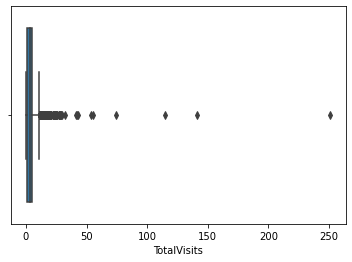

In [77]:
#plotting boxplot for TotalVisits
sns.boxplot(df["TotalVisits"])

Here, we can see that till 150, the values are almost continuous. But after that, we have outliers. Thus we should remove them.

In [79]:
#dropping the outliers
df = df[df["TotalVisits"]<=150]

In [80]:
df.shape

(9028, 10)

Now checking for Time_Website.

<AxesSubplot:xlabel='Time_Website'>

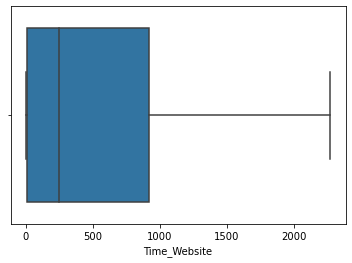

In [81]:
sns.boxplot(df["Time_Website"])

The values seem to be well inside whiskers and pretty continuous. Thus converted does not have any outlier. lets now check for Page_per_Visit.

<AxesSubplot:xlabel='Page_per_Visit'>

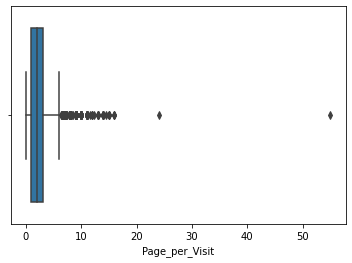

In [83]:
sns.boxplot(df["Page_per_Visit"])

Here also, we can say that we have outlier records where Page_per_Visit>25, thus removing the outliers from the data.

In [84]:
df = df[df["Page_per_Visit"]<=25]

In [85]:
df.shape

(9027, 10)

Thus our outlier analysis is hence complete.Now moving on to create dummy values for the categorical variables.

**Creating dummy values for categorical variables**

In [87]:
df.head()

,Lead_Origin,Lead_Source,Not_Email,Converted,TotalVisits,Time_Website,Page_per_Visit,Last_Activity,free_Copy_Master_Interview,Last_Notable_Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,No,Modified


First lets start with binary categorical variables. Such variables are: Not_Email and free_Copy_Master_Interview.In these, lets map 'Yes' to 1 and 'No' to 0.

In [88]:
varlist =  ['Not_Email', 'free_Copy_Master_Interview']
# creating the map
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [89]:
df[varlist] = df[varlist].apply(binary_map)

In [90]:
df.head()

,Lead_Origin,Lead_Source,Not_Email,Converted,TotalVisits,Time_Website,Page_per_Visit,Last_Activity,free_Copy_Master_Interview,Last_Notable_Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,Modified


Now, since binary mapping is done. Now moving to categorical variables with more than 2 levels. Such variables are: Lead_Origin, Lead_Source, Last_Activity, Last_Notable_Activity.

In [95]:
df["Lead_Origin"].value_counts()

Landing Page Submission    4857
API                        3566
Lead Add Form               574
Lead Import                  30
Name: Lead_Origin, dtype: int64

In [100]:
#Creating dummy variables
m = pd.get_dummies(df['Lead_Origin'], prefix='LO')
m= m.drop("LO_Landing Page Submission",axis=1)
df = pd.concat([df,m],axis=1)

In [101]:
df.head()

,Lead_Origin,Lead_Source,Not_Email,Converted,TotalVisits,Time_Website,Page_per_Visit,Last_Activity,free_Copy_Master_Interview,Last_Notable_Activity,LO_API,LO_Lead Add Form,LO_Lead Import
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,Modified,1,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,Email Opened,1,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1,Email Opened,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,Modified,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,Modified,0,0,0


In [102]:
df['Lead_Source'].value_counts()

Google              2861
Direct Traffic      2536
Olark Chat          1749
Organic Search      1153
Reference            442
Welingak Website     129
Referral Sites       125
Facebook              31
WeLearn                1
Name: Lead_Source, dtype: int64

In [104]:
#removing WeLearn since it has only single record
df = df[df['Lead_Source']!="WeLearn"]
df['Lead_Source'].value_counts()

Google              2861
Direct Traffic      2536
Olark Chat          1749
Organic Search      1153
Reference            442
Welingak Website     129
Referral Sites       125
Facebook              31
Name: Lead_Source, dtype: int64

In [105]:
#creating dummy variables for Lead_Source
m = pd.get_dummies(df['Lead_Source'], prefix='LS')
m= m.drop("LS_Welingak Website",axis=1)
df = pd.concat([df,m],axis=1)

In [106]:
df.head()

,Lead_Origin,Lead_Source,Not_Email,Converted,TotalVisits,Time_Website,Page_per_Visit,Last_Activity,free_Copy_Master_Interview,Last_Notable_Activity,LO_API,LO_Lead Add Form,LO_Lead Import,LS_Direct Traffic,LS_Facebook,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Reference,LS_Referral Sites
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,Modified,1,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,Email Opened,1,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1,Email Opened,0,0,0,1,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,Modified,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,Modified,0,0,0,0,0,1,0,0,0,0


In [108]:
# Creating dummy variables for Last_Activity
df['Last_Activity'].value_counts()

Email Opened                 3422
SMS Sent                     2712
Olark Chat Conversation       971
Page Visited on Website       629
Converted to Lead             426
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     115
Unreachable                    89
Unsubscribed                   58
Had a Phone Conversation       25
Name: Last_Activity, dtype: int64

In [109]:
m = pd.get_dummies(df['Last_Activity'], prefix='LA')
m= m.drop("LA_Had a Phone Conversation",axis=1)
df = pd.concat([df,m],axis=1)

In [110]:
df.head()

,Lead_Origin,Lead_Source,Not_Email,Converted,TotalVisits,Time_Website,Page_per_Visit,Last_Activity,free_Copy_Master_Interview,Last_Notable_Activity,...,LA_Converted to Lead,LA_Email Bounced,LA_Email Link Clicked,LA_Email Opened,LA_Form Submitted on Website,LA_Olark Chat Conversation,LA_Page Visited on Website,LA_SMS Sent,LA_Unreachable,LA_Unsubscribed
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,Modified,...,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,Email Opened,...,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1,Email Opened,...,0,0,0,1,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,Modified,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,Modified,...,1,0,0,0,0,0,0,0,0,0


In [111]:
#Creating dummy variables for Last_Notable_Activity
df['Last_Notable_Activity'].value_counts()

Modified                    3242
Email Opened                2814
SMS Sent                    2149
Page Visited on Website      315
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  44
Unreachable                   32
Had a Phone Conversation      14
Name: Last_Notable_Activity, dtype: int64

In [112]:
m = pd.get_dummies(df['Last_Notable_Activity'], prefix='LNA')
m= m.drop("LNA_Had a Phone Conversation",axis=1)
df = pd.concat([df,m],axis=1)

In [113]:
df.head()

,Lead_Origin,Lead_Source,Not_Email,Converted,TotalVisits,Time_Website,Page_per_Visit,Last_Activity,free_Copy_Master_Interview,Last_Notable_Activity,...,LA_Unsubscribed,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,Modified,...,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,Email Opened,...,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1,Email Opened,...,0,0,0,1,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,Modified,...,0,0,0,0,1,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,Modified,...,0,0,0,0,1,0,0,0,0,0


In [114]:
df.shape

(9026, 39)

Now we need to drop the repeated variables for which we have already created the dummy variables.

In [119]:
#dropping some variables
df.drop(['Lead_Origin','Lead_Source','Last_Activity','Last_Notable_Activity'],axis=1,inplace=True)

In [120]:
df.shape

(9026, 35)

So finally for our analysis, we have 9026 rows left and 35 fields out of which "Converted" is out target variable. Now finally moving to test-train-split.

**Checking correlation between feature variables**

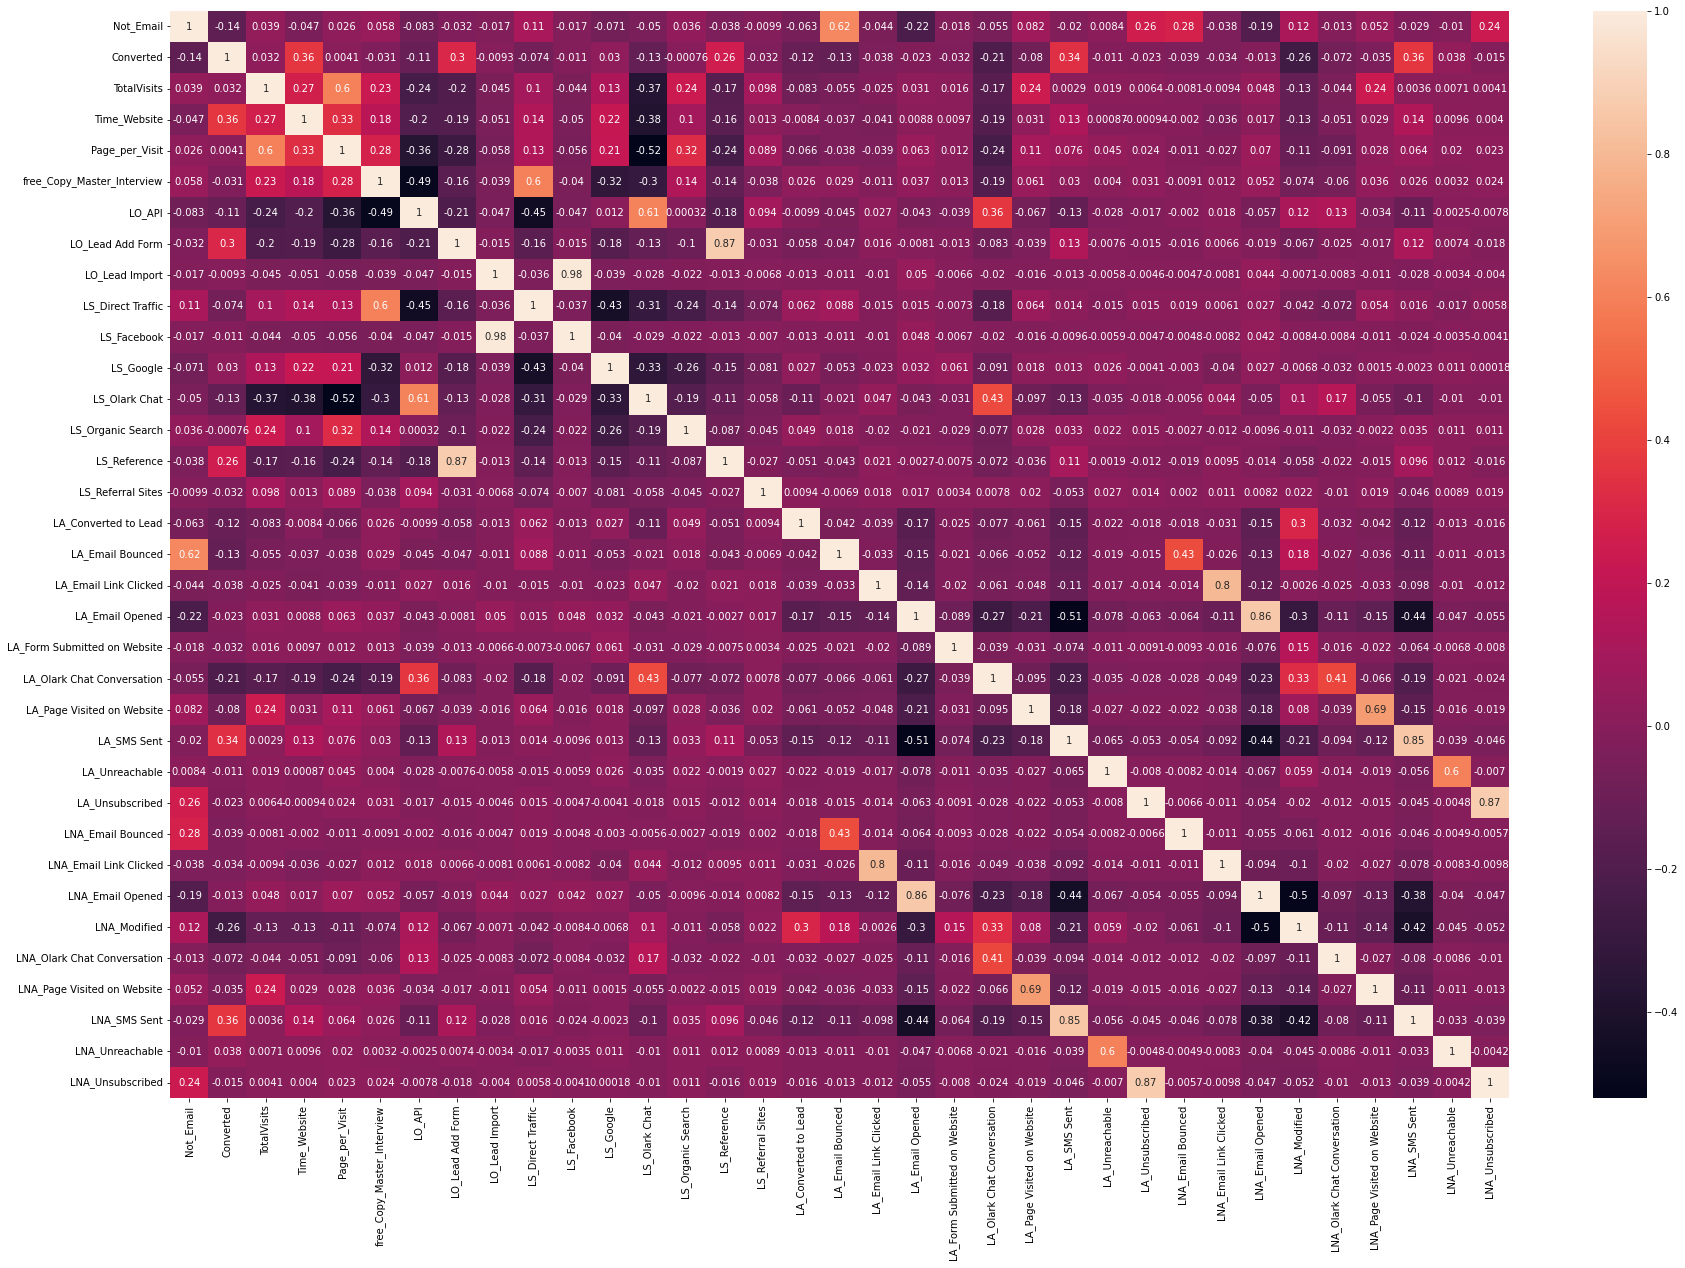

In [199]:
#Lets draw the correlation matrix
plt.figure(figsize = (30,20)) 
sns.heatmap(df.corr(),annot = True)
plt.show()

Some of the variables having high correlation values are:

1. Page_per_Visits and TotalVisits
2. LS_Direct_Traffic and free_Copy_Master_Interview
3. LS_Olark Chat and LO_API
4. LS_Reference and LO_Lead Add Form
5. LS_Facebook and LO_Lead import
6. Not_Email and LA_Email Bounced
7. LNA_Email Link Clicked and LA_Email Link Clicked
8. LA_Email_Opened and LNA_Email_Opened
9. LA_Page Visited on Website and LNA_Page Visited on Website
10. LA_SMS_Sent and LNA_SMS_Sent
11. LA_Unreachable and LNA_Unreachable
12. LA_Unsubscribed and LNA_Unsubscribed \
For dealng with this, we will remove one of the columns from the columns that are higly correlated.

In [200]:
#dropping the required columns
df = df.drop(["Page_per_Visit","free_Copy_Master_Interview","LO_API","LO_Lead Add Form","LO_Lead Import","LA_Email Bounced","LA_Email Link Clicked","LA_Email Opened","LA_Page Visited on Website","LA_SMS Sent","LA_Unreachable","LA_Unsubscribed"],axis=1)

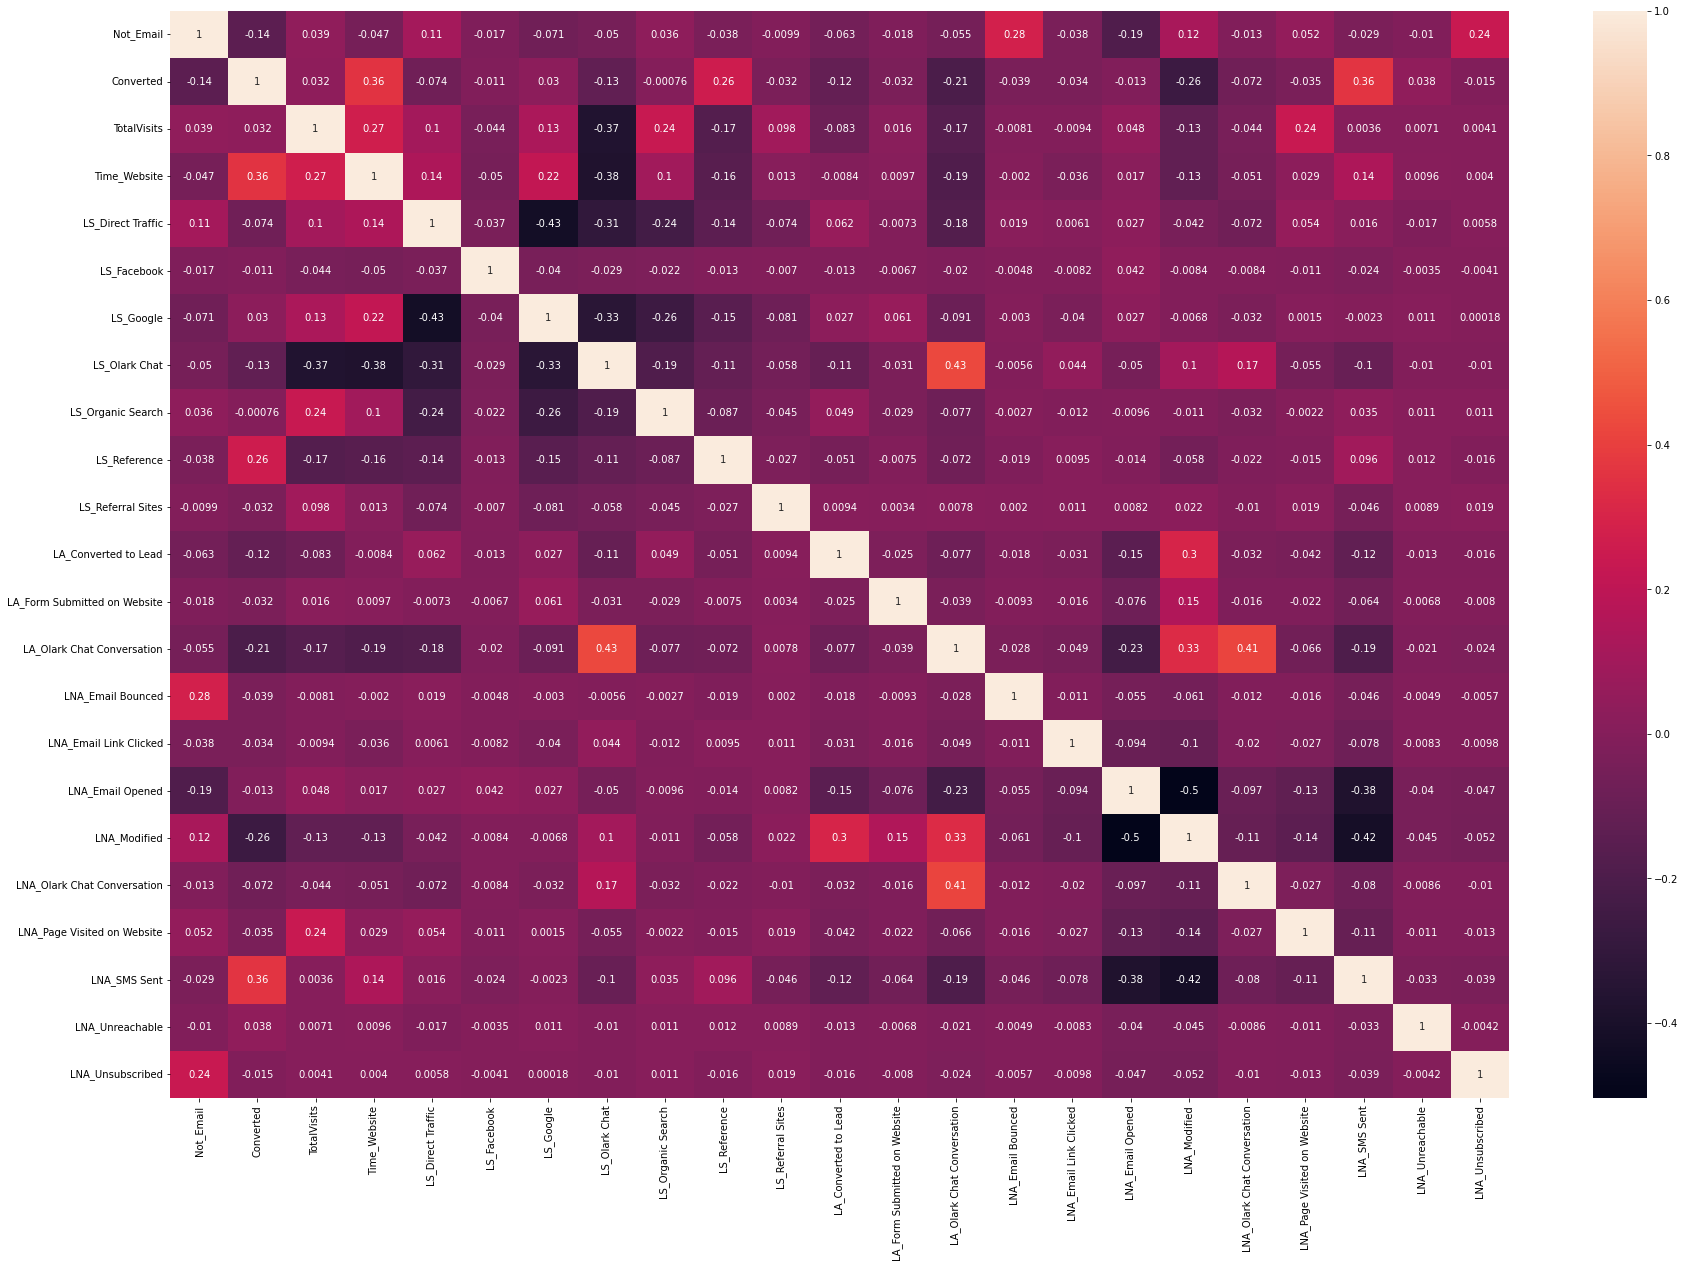

In [202]:
plt.figure(figsize = (30,20))
sns.heatmap(df.corr(),annot = True)
plt.show()

Now, we can see we don't have any column with too much high correlation.

**TEST-TRAIN SPLIT**

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
#putting feature variables in X
X = df.drop("Converted",axis=1)

In [205]:
X.head()

,Not_Email,TotalVisits,Time_Website,LS_Direct Traffic,LS_Facebook,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Reference,LS_Referral Sites,...,LA_Olark Chat Conversation,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed
0,0,0.0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,2.0,1532,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1.0,305,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2.0,1428,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [206]:
#putting response variable to y
y = df["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [280]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

**Feature Scaling**

In [281]:
from sklearn.preprocessing import StandardScaler

So, we will scale our numeric variables. The numeric variables in our dataset are: TotalVisits, Time_Website and Page_per_Visit.

In [282]:
scaler = StandardScaler()

X_train[['TotalVisits','Time_Website']] = scaler.fit_transform(X_train[['TotalVisits','Time_Website']])

X_train.head()

,Not_Email,TotalVisits,Time_Website,LS_Direct Traffic,LS_Facebook,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Reference,LS_Referral Sites,...,LA_Olark Chat Conversation,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed
1148,0,-0.597633,-0.581504,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
262,0,-0.843552,-0.885681,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1515,1,0.140125,2.038815,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2029,0,1.615640,-0.616320,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1819,0,-0.105794,0.662689,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


**Checking the churn rate to see if the data is balanced**

In [283]:
churn  = sum(df["Converted"])*100/df.shape[0]

In [284]:
churn

37.8240638156437

Thus we have a good churn rate. The data is almost balanced.


Now, we can see we don't have any column with too much high correlation.

In [285]:
X_train.shape

(6318, 22)

## Model Building

In [286]:
import statsmodels.api as sm

In [287]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6318
Model:                            GLM   Df Residuals:                     6295
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2768.7
Date:                Tue, 21 Mar 2023   Deviance:                       5537.5
Time:                        01:27:12   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3601
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            7.9862      1.312      6.087      0.000       5.415      10.558
Not_Email                       -1.5542      0.179     -8.686      0.000      -1.905      -1.204
TotalVisits                      0.1114      0.037      2.977      0.003       0.038       0.185
Time_Website                     1.0951      0.039     28.001      0.000       1.018       1.172
LS_Direct Traffic               -6.0667      0.730     -8.312      0.000      -7.497      -4.636
LS_Facebook                     -4.2639      0.853     -4.996      0.000      -5.937      -2.591
LS_Google                       -5.8091      0.729     -7.963      0.000      -7.239      -4.379
LS_Olark Chat                   -4.6552      0.729     -6.386      0.000      -6.084      -3.227
LS_Organic Search               -5.8416      0.734     -7.957      0.000      -7.280      -4.403
LS_Reference                    -1.5251      0.757     -2.014      0.044      -3.009      -0.041
LS_Referral Sites               -6.2235      0.793     -7.845      0.000      -7.778      -4.669
LA_Converted to Lead            -0.5711      0.206     -2.778      0.005      -0.974      -0.168
LA_Form Submitted on Website    -0.0980      0.305     -0.322      0.748      -0.695       0.499
LA_Olark Chat Conversation      -1.4705      0.198     -7.437      0.000      -1.858      -1.083
LNA_Email Bounced               -2.8033      1.192     -2.353      0.019      -5.139      -0.468
LNA_Email Link Clicked          -3.7073      1.118     -3.317      0.001      -5.898      -1.516
LNA_Email Opened                -3.2217      1.093     -2.947      0.003      -5.364      -1.079
LNA_Modified                    -3.5527      1.095     -3.246      0.001      -5.698      -1.407
LNA_Olark Chat Conversation     -3.1413      1.147     -2.739      0.006      -5.389      -0.894
LNA_Page Visited on Website     -3.5571      1.108     -3.209      0.001      -5.730      -1.385
LNA_SMS Sent                    -1.6773      1.094     -1.533      0.125      -3.821       0.467
LNA_Unreachable                 -1.5668      1.200     -1.305      0.192      -3.919       0.786
LNA_Unsubscribed                -1.8475      1.184     -1.560      0.119      -4.168       0.473
================================================================================================
"""

### Feature Selection using RFE

Lets use Recursive feature elimination to eliminate and finally select only 15 elements for logistic regression analysis.

In [288]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [289]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=
          15)            
rfe = rfe.fit(X_train, y_train)

In [290]:
rfe.support_

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True, False, False, False])

In [291]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Not_Email', True, 1),
 ('TotalVisits', False, 8),
 ('Time_Website', True, 1),
 ('LS_Direct Traffic', True, 1),
 ('LS_Facebook', True, 1),
 ('LS_Google', True, 1),
 ('LS_Olark Chat', True, 1),
 ('LS_Organic Search', True, 1),
 ('LS_Reference', True, 1),
 ('LS_Referral Sites', True, 1),
 ('LA_Converted to Lead', False, 4),
 ('LA_Form Submitted on Website', False, 7),
 ('LA_Olark Chat Conversation', True, 1),
 ('LNA_Email Bounced', False, 5),
 ('LNA_Email Link Clicked', True, 1),
 ('LNA_Email Opened', True, 1),
 ('LNA_Modified', True, 1),
 ('LNA_Olark Chat Conversation', True, 1),
 ('LNA_Page Visited on Website', True, 1),
 ('LNA_SMS Sent', False, 2),
 ('LNA_Unreachable', False, 3),
 ('LNA_Unsubscribed', False, 6)]

In [292]:
col = X_train.columns[rfe.support_]

In [293]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'LA_Converted to Lead', 'LA_Form Submitted on Website',
       'LNA_Email Bounced', 'LNA_SMS Sent', 'LNA_Unreachable',
       'LNA_Unsubscribed'],
      dtype='object')

The above columns are eliminated using RFE.

**Assessing the model with Statsmodel**


In [294]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6318
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2784.0
Date:                Tue, 21 Mar 2023   Deviance:                       5568.0
Time:                        01:27:21   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3570
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           6.2687      0.731      8.577      0.000       4.836       7.701
Not_Email                      -1.6957      0.158    -10.729      0.000      -2.005      -1.386
Time_Website                    1.1006      0.039     28.273      0.000       1.024       1.177
LS_Direct Traffic              -6.0253      0.731     -8.247      0.000      -7.457      -4.593
LS_Facebook                    -4.2884      0.855     -5.013      0.000      -5.965      -2.612
LS_Google                      -5.7553      0.730     -7.882      0.000      -7.186      -4.324
LS_Olark Chat                  -4.6931      0.731     -6.422      0.000      -6.125      -3.261
LS_Organic Search              -5.7417      0.734     -7.827      0.000      -7.179      -4.304
LS_Reference                   -1.5334      0.759     -2.020      0.043      -3.022      -0.045
LS_Referral Sites              -6.1640      0.792     -7.785      0.000      -7.716      -4.612
LA_Olark Chat Conversation     -1.3862      0.195     -7.099      0.000      -1.769      -1.003
LNA_Email Link Clicked         -2.0147      0.247     -8.156      0.000      -2.499      -1.531
LNA_Email Opened               -1.5327      0.086    -17.808      0.000      -1.701      -1.364
LNA_Modified                   -1.9635      0.094    -20.839      0.000      -2.148      -1.779
LNA_Olark Chat Conversation    -1.5240      0.353     -4.316      0.000      -2.216      -0.832
LNA_Page Visited on Website    -1.7153      0.198     -8.656      0.000      -2.104      -1.327
===============================================================================================
"""

Here, we can see the p-values are very low. Now lets check the VIF value for each of these variables.

**VIF Calculation**

In [295]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,LNA_Modified,2.81
11,LNA_Email Opened,2.32
4,LS_Google,2.13
5,LS_Olark Chat,2.03
2,LS_Direct Traffic,2.02
9,LA_Olark Chat Conversation,1.97
6,LS_Organic Search,1.41
13,LNA_Olark Chat Conversation,1.38
1,Time_Website,1.30
0,Not_Email,1.19


Here, we can see that VIF value for each of the column is very less, So we are good to go. Now lets check some other metrics.

**Prediction on trained dataset**

In [296]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [297]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})

In [298]:
y_train_pred_final.head()

,Churn,Churn_Prob
0,1,0.086270
1,1,0.977273
2,0,0.236533
3,1,0.154779
4,1,0.776051


Now first assuming the cutoff to be 0.5, lets calculate all the metrics.

In [299]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.086270,0
1,1,0.977273,1
2,0,0.236533,0
3,1,0.154779,0
4,1,0.776051,1


**Accuracy**

Lets now find the confusion matrix.

In [300]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3466,  484],
       [ 784, 1584]], dtype=int64)

In [301]:
#finding the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))


0.7993035770813549


So, this model gives a very good accuracy score. But now, lets also check some other metrics for judging our model.

In [302]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

**Sensitivity**

In [303]:
TP / float(TP+FN)

0.668918918918919

Sensitivity score is not that good, even when our accuracy was good. We want to maximise this metric, since we don't want to lose any potential customer.Now, lets calculate recall.

**Specificity**

In [304]:
TN / float(TN+FP)

0.8774683544303797

Specificity score is very good.

### Finding the optimal cutoff point

In [305]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.086270,0,1,0,0,0,0,0,0,0,0,0
1,1,0.977273,1,1,1,1,1,1,1,1,1,1,1
2,0,0.236533,0,1,1,1,0,0,0,0,0,0,0
3,1,0.154779,0,1,1,0,0,0,0,0,0,0,0
4,1,0.776051,1,1,1,1,1,1,1,1,1,0,0


In [306]:
# Calculating accuracy, sensitivity and specificity for each of the cutoff point
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.374802     1.000000     0.000000
0.1   0.1  0.560304     0.972128     0.313418
0.2   0.2  0.732194     0.906250     0.627848
0.3   0.3  0.798829     0.827703     0.781519
0.4   0.4  0.799145     0.755912     0.825063
0.5   0.5  0.799304     0.668919     0.877468
0.6   0.6  0.785375     0.575591     0.911139
0.7   0.7  0.758784     0.440034     0.949873
0.8   0.8  0.738841     0.354307     0.969367
0.9   0.9  0.697689     0.214527     0.987342


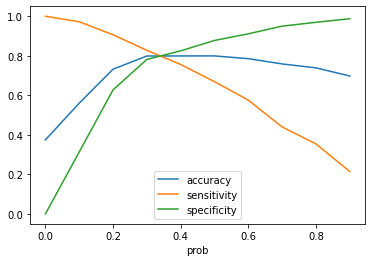

In [307]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

Here, 0.35 seems to be a good cutoff point. Now, finding the predictions in the train_dataset with this cutoff value and then all the metrics

In [382]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.086270,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.977273,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.236533,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.154779,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.776051,1,1,1,1,1,1,1,1,1,0,0,1


In [383]:
# finding the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8016777461221906

Overall accuracy score is good for the model. Now lets see the confusion matrix.

In [384]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion

array([[3163,  787],
       [ 466, 1902]], dtype=int64)

In [385]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [386]:
#finding sensitivity
TP / float(TP+FN)

0.8032094594594594

In [387]:
#finding sensitivity
TN / float(TN+FP)

0.8007594936708861

Thus, at this cutoff value we are getting good value for sensitivity as well as specificity. Thus, this cutoff seems to be the optimal value.

## Making predictions on the test dataset 

In [388]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6318 entries, 1148 to 5791
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Not_Email                     6318 non-null   int64  
 1   TotalVisits                   6318 non-null   float64
 2   Time_Website                  6318 non-null   float64
 3   LS_Direct Traffic             6318 non-null   uint8  
 4   LS_Facebook                   6318 non-null   uint8  
 5   LS_Google                     6318 non-null   uint8  
 6   LS_Olark Chat                 6318 non-null   uint8  
 7   LS_Organic Search             6318 non-null   uint8  
 8   LS_Reference                  6318 non-null   uint8  
 9   LS_Referral Sites             6318 non-null   uint8  
 10  LA_Converted to Lead          6318 non-null   uint8  
 11  LA_Form Submitted on Website  6318 non-null   uint8  
 12  LA_Olark Chat Conversation    6318 non-null   uint8  
 13  

In [395]:
# applying scaling to X_test
X_test[['Time_Website','TotalVisits']] = scaler.transform(X_test[['Time_Website','TotalVisits']])

In [394]:
X_test = X_test[col]
X_test.head()

,Not_Email,Time_Website,LS_Direct Traffic,LS_Facebook,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Reference,LS_Referral Sites,LA_Olark Chat Conversation,LNA_Email Link Clicked,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website
5302,0,-1.102013,0,0,0,1,0,0,0,1,0,0,1,0,0
1491,0,3.939690,0,0,0,0,1,0,0,0,0,1,0,0,0
9179,0,1.574998,0,0,1,0,0,0,0,1,0,0,1,0,0
2383,0,-1.102013,0,0,0,1,0,0,0,1,0,0,1,0,0
3606,0,-1.102013,0,0,0,1,0,0,0,1,0,0,0,1,0


In [396]:
#Addind constant to X_test
X_test_sm = sm.add_constant(X_test)

In [397]:
y_test_pred = res.predict(X_test_sm)

In [398]:
#Converting the churn probabilities to a dataframe
y_pred_df = pd.DataFrame(y_test_pred)

In [399]:
y_pred_df.head()

,0
5302,0.048020
1491,0.965458
9179,0.249224
2383,0.048020
3606,0.072599


In [400]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
5302,0
1491,0
9179,0
2383,0
3606,0


In [401]:
#resetting the index and joining the two dataframes
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [402]:
y_pred_final.head()

,Converted,0
0,0,0.048020
1,0,0.965458
2,0,0.249224
3,0,0.048020
4,0,0.072599


In [403]:
#Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [404]:
y_pred_final.head()

,Converted,Churn_Prob
0,0,0.048020
1,0,0.965458
2,0,0.249224
3,0,0.048020
4,0,0.072599


In [405]:
# Using the found cutoff value to predict if a person will churn or not.
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [406]:
y_pred_final.head()

,Converted,Churn_Prob,final_predicted
0,0,0.048020,0
1,0,0.965458,1
2,0,0.249224,0
3,0,0.048020,0
4,0,0.072599,0


**Calculating accuracy, sensitivity and specificity on test data**

In [407]:
#Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.5790251107828656

We can see that overall accuracy for the model is low. Now, lets find the sensitivity and specificity.

**Sensitivity**

In [408]:
#confusion matrix
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion

array([[ 619, 1043],
       [  97,  949]], dtype=int64)

In [409]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [410]:
#Sensitivity
TP / float(TP+FN)

0.9072657743785851

As we can see the sensitivity of our model is quite high.

In [411]:
#Specificity
TN / float(TN+FP)

0.3724428399518652

## Assigning the lead score

Lead score = Churn_Probablity*100

In [412]:
y_train_pred_df = y_train_pred_final[["Churn","Churn_Prob","final_predicted"]]

In [413]:
y_test_pred_df = y_pred_final

In [414]:
y_test_pred_df.rename(columns = {"Converted":"Churn"},inplace=True)

In [415]:
y_train_pred_df.head()

,Churn,Churn_Prob,final_predicted
0,1,0.086270,0
1,1,0.977273,1
2,0,0.236533,0
3,1,0.154779,0
4,1,0.776051,1


In [416]:
y_test_pred_df.head()

,Churn,Churn_Prob,final_predicted
0,0,0.048020,0
1,0,0.965458,1
2,0,0.249224,0
3,0,0.048020,0
4,0,0.072599,0


In [417]:
comb_df = pd.concat([y_train_pred_df,y_test_pred_df])

In [418]:
comb_df.shape

(9026, 3)

In [419]:
comb_df["Lead_Score"] = comb_df["Churn_Prob"]*100

In [420]:
comb_df.head()

,Churn,Churn_Prob,final_predicted,Lead_Score
0,1,0.086270,0,8.626953
1,1,0.977273,1,97.727279
2,0,0.236533,0,23.653257
3,1,0.154779,0,15.477893
4,1,0.776051,1,77.605137


So here we can check the lead score for each record in the given dataset.